> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

This analysis looks into the relations that genre, release year, and revenue (adjusted for inflation) have with a movies' overall rating and profit based on the data from The Movie Database (TMDb), which includes information, classifications, and statistics about nearly 10,000 movies.

The questions to be answered are:

1. Which movies genres have the highest revenue?
2. Which year has the highest release of movies?
3. Which genres have the most movies?


Please note that the explanations for the executed code will precede the code itself throughout the report.

In [2]:
#Begin by importing the libraries for needed for analysis and set inline plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Loading the data set
df = pd.read_csv('tmdb-movies.csv')
# The First look
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# checking the number of rows and columns
df.shape

(10866, 21)

In [9]:
# trying to figure out the relationships
df.describe()

,id,popularity,runtime,vote_average,release_year,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04
mean,66064.177434,0.646441,102.070863,5.974922,2001.322658,5.136436e+07
std,92130.136561,1.000185,31.381405,0.935142,12.812941,1.446325e+08
min,5.000000,0.000065,0.000000,1.500000,1960.000000,0.000000e+00
25%,10596.250000,0.207583,90.000000,5.400000,1995.000000,0.000000e+00
50%,20669.000000,0.383856,99.000000,6.000000,2006.000000,0.000000e+00
75%,75610.000000,0.713817,111.000000,6.600000,2011.000000,3.369710e+07
max,417859.000000,32.985763,900.000000,9.200000,2015.000000,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Removing or dropping the unnecessary coulmns.
df.drop(['imdb_id','budget','revenue','homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'budget_adj'],axis =1, inplace = True)
df.head()

KeyError: "['imdb_id' 'budget' 'revenue' 'homepage' 'director' 'tagline' 'keywords'\n 'overview' 'production_companies' 'vote_count' 'budget_adj'] not found in axis"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 849.0+ KB


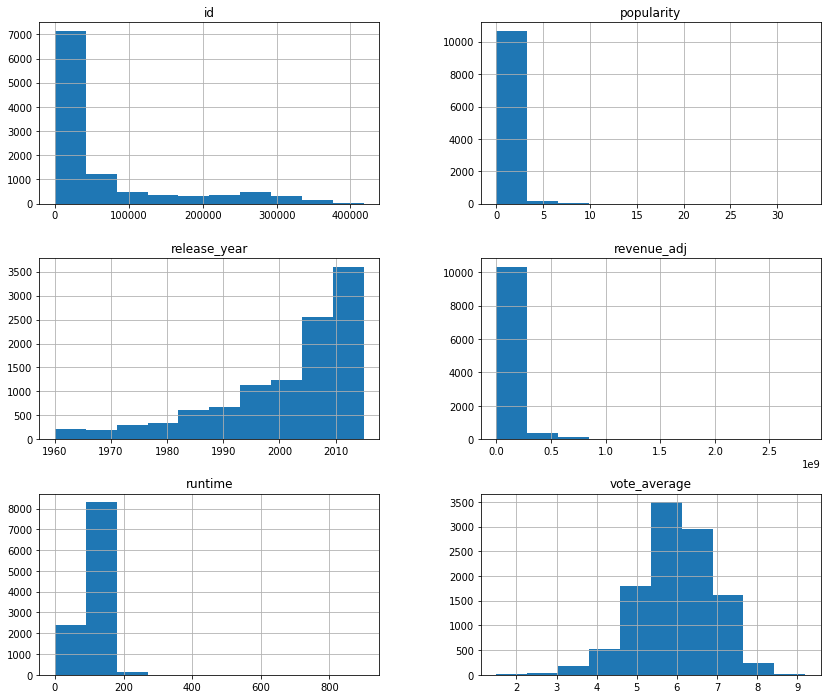

In [11]:
#Checking the data types, null values, and plotting the data distribution
df.info()
df.hist(figsize=(14,12));

In [12]:
#Checking the null values in genres column to figure out the best way to deal with them
df[df.genres.isnull()]

,id,popularity,original_title,cast,runtime,genres,release_date,vote_average,release_year,revenue_adj
424,363869,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,100,NaN,10/29/15,6.1,2015,0.0
620,361043,0.129696,All Hallows' Eve 2,NaN,90,NaN,10/6/15,5.0,2015,0.0
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,44,NaN,10/3/14,6.8,2014,0.0
1712,21634,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,88,NaN,2/27/09,7.4,2009,0.0
1897,40534,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,76,NaN,2/27/09,7.0,2009,0.0
2370,127717,0.081892,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,0,NaN,6/5/10,5.8,2010,0.0
2376,315620,0.068411,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,62,NaN,12/25/10,7.7,2010,0.0
2853,57892,0.130018,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,110,NaN,2/2/01,7.2,2001,0.0
3279,54330,0.145331,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,96,NaN,8/13/08,6.1,2008,0.0
4547,123024,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,220,NaN,7/27/12,8.3,2012,0.0


In [13]:
#Checking the null values in Cast column to figure out the best way to deal with them
df[df.cast.isnull()]

,id,popularity,original_title,cast,runtime,genres,release_date,vote_average,release_year,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,7,Animation,11/25/15,6.9,2015,0.000000e+00
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,98,Documentary,10/9/15,8.2,2015,0.000000e+00
465,321109,0.201696,Bitter Lake,NaN,135,Documentary,1/24/15,7.8,2015,0.000000e+00
536,333350,0.122543,A Faster Horse,NaN,90,Documentary,10/8/15,8.0,2015,0.000000e+00
538,224972,0.114264,The Mask You Live In,NaN,88,Documentary,1/1/15,8.9,2015,0.000000e+00
587,319091,0.062536,The Hunting Ground,NaN,103,Documentary,2/27/15,7.8,2015,0.000000e+00
600,332479,0.047256,Star Wars: TIE Fighter,NaN,7,Science Fiction|Action|Animation,3/24/15,7.6,2015,0.000000e+00
620,361043,0.129696,All Hallows' Eve 2,NaN,90,NaN,10/6/15,5.0,2015,0.000000e+00
1088,169607,0.226028,Finding Vivian Maier,NaN,83,Documentary,3/28/14,7.8,2014,1.384967e+06
1173,261041,0.159037,The Search for General Tso,NaN,71,Documentary,4/20/14,6.9,2014,0.000000e+00


In [14]:
#Removing null values.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 10 columns):
id                10768 non-null int64
popularity        10768 non-null float64
original_title    10768 non-null object
cast              10768 non-null object
runtime           10768 non-null int64
genres            10768 non-null object
release_date      10768 non-null object
vote_average      10768 non-null float64
release_year      10768 non-null int64
revenue_adj       10768 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 925.4+ KB


In [15]:
#checking if there are any duplicates in the data set.
df.duplicated().sum()

1

In [16]:
#Removing all duplicates.
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 10 columns):
id                10767 non-null int64
popularity        10767 non-null float64
original_title    10767 non-null object
cast              10767 non-null object
runtime           10767 non-null int64
genres            10767 non-null object
release_date      10767 non-null object
vote_average      10767 non-null float64
release_year      10767 non-null int64
revenue_adj       10767 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 925.3+ KB


In [17]:
#rename revenue_adj
df.rename(columns={'revenue_adj':'revenue'} , inplace = True ) 
df.head(1)

,id,popularity,original_title,cast,runtime,genres,release_date,vote_average,release_year,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.392446e+09


In [18]:
#creating a new function to remove zeros from the data set 
def remove_zeros(df, column):
    df[column] = df[column][df[column] != 0]
    return df

In [19]:
#removing zeros from runtime , and revenue columns
remove_zeros(df,'runtime') 
remove_zeros(df,'revenue')
#Removing null values.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844 entries, 0 to 10848
Data columns (total 10 columns):
id                4844 non-null int64
popularity        4844 non-null float64
original_title    4844 non-null object
cast              4844 non-null object
runtime           4844 non-null float64
genres            4844 non-null object
release_date      4844 non-null object
vote_average      4844 non-null float64
release_year      4844 non-null int64
revenue           4844 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 416.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres have the highest revenue?)
##### In this section we will check which movie gener has the highest revenue in the data set

In [20]:
#Creating a unique set of genres
genres_set = set()

for genres in df.genres.iteritems():
    for genre in genres[1].split('|'):
        genres_set.add(genre)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [21]:
#Making a copy of the data set
df_genres = df.copy()
df_genres.head()

,id,popularity,original_title,cast,runtime,genres,release_date,vote_average,release_year,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.0,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.0,Action|Crime|Thriller,4/1/15,7.3,2015,1.385749e+09


In [22]:
#creating a coulmn for each genre in the gener set with boolean values
for genre in genres_set:
    df_genres[genre] = df_genres.genres.str.contains(genre)
#checking if the columns created correctly by adjusting the display(through slicing)    
df_genres.head().iloc[:,10:]

,Documentary,War,Horror,Romance,Adventure,Science Fiction,History,Music,TV Movie,Western,Foreign,Drama,Animation,Crime,Comedy,Mystery,Fantasy,Action,Family,Thriller
0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True


In [23]:
# This dictionary will be used to create a new data frame
genre_rev_means_dict = {'mean_revenue': {}}

# For each genre and associated mean revenue, add a key/value to the 'mean_revenue' column
for genre in genres_set:
    mean_rev = df_genres[df_genres[genre]].revenue.mean()
    genre_rev_means_dict['mean_revenue'][genre] = mean_rev

# Create and sort the data frame

df_mean_rev_genre = pd.DataFrame.from_dict(genre_rev_means_dict)
df_mean_rev_genre.sort_values(by=['mean_revenue'],ascending=False, inplace=True)

df_mean_rev_genre

,mean_revenue
Animation,2.514516e+08
Adventure,2.472174e+08
Fantasy,2.210206e+08
Family,2.105339e+08
Science Fiction,1.824172e+08
Action,1.736125e+08
War,1.379288e+08
Western,1.170263e+08
Thriller,1.130216e+08
History,1.046721e+08


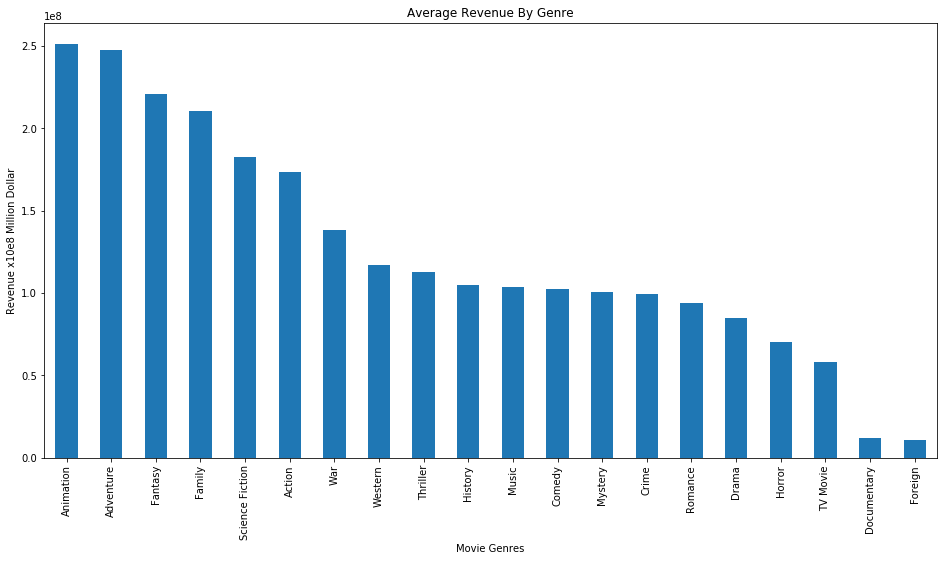

In [24]:
#Here's a plot of the data:
df_mean_rev_genre.plot(kind='bar', figsize=(16,8), legend=False)
plt.title('Average Revenue By Genre')
plt.xlabel('Movie Genres')
plt.ylabel('Revenue x10e8 Million Dollar');

### From the above chart it's obvious that the Animation movies genere is associated with the highst revenue

### Research Question 2  (Which year has the highest release of movies?)

In [25]:
# Counting the number of movies per each release year
Releas_years_df =df.groupby('release_year').count()['id']

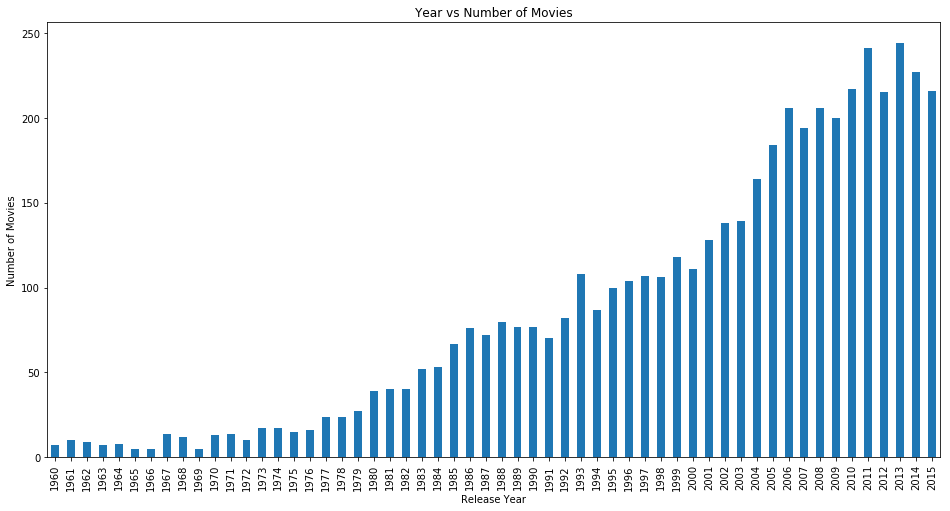

In [26]:
#Here's a plot of the data:
Releas_years_df.plot(kind = 'bar',figsize=(16,8))
plt.title("Year vs Number of Movies")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies');

### From the above chart it's obvious that the number of movies increase through time and the year 2013 was associated with the highest release of movies

### Research Question 3  (which genres have the most movies?)

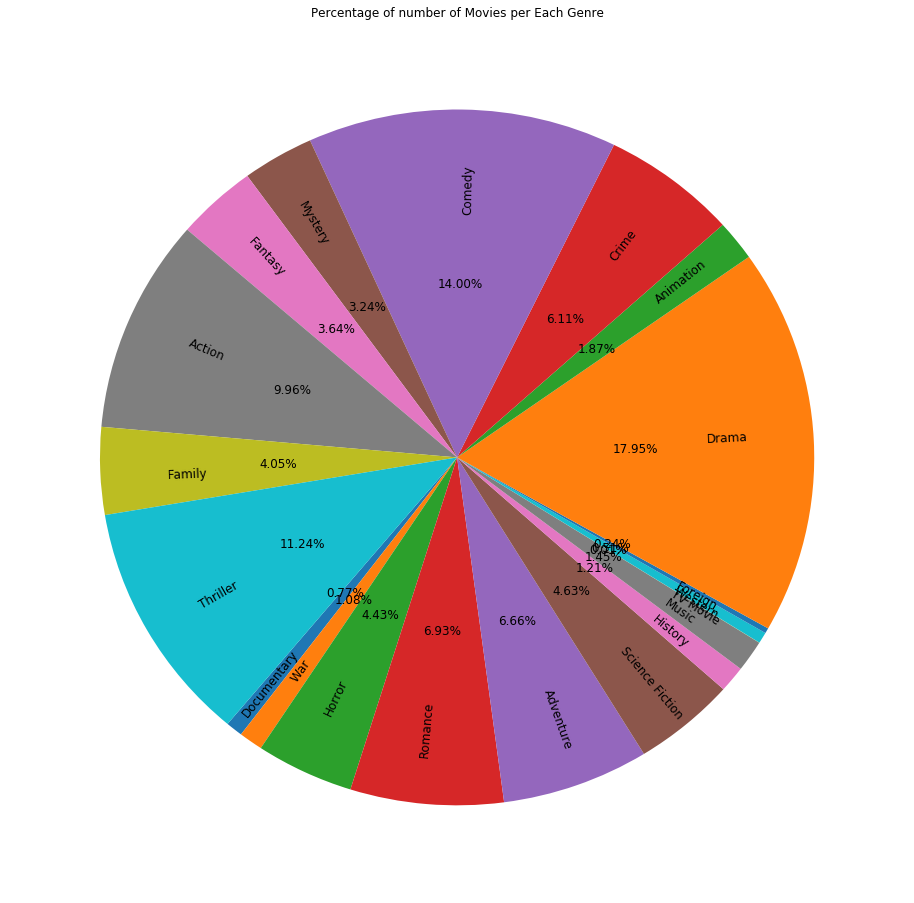

In [29]:
#creating a list of lists contains each genre with the number of movies 
genre_count = []
for genre in genres_set: 
    genre_count.append([genre, df_genres[genre][df_genres[genre]==True].count()])

#Plotting the results
genre, count = [*zip(*genre_count)]
plt.figure(figsize = (16, 16))
plt.title('Percentage of number of Movies per Each Genre')
plt.pie(count, labels = genre, rotatelabels = True, autopct = '%1.2f%%', pctdistance = 0.5, startangle = 230, textprops = {'fontsize': 12}, labeldistance = 0.7);

### From the above charts, it is easy to see which genres have the most movies. The top three genres are Drama, Comedy, and Thriller.

<a id='conclusions'></a>
## Conclusions

This report has analyzed the The Movie Database (TMDb) to determine the answers to these three questions.

1. Which movies genres have the highest revenue?
2. Which year has the highest release of movies?
3. Which genres have the most movies?

#### Results
The most profitible movie genre by year varied as well, but the Animation genre was the genre that had the highest average revenue across the most years. This may be because this genre a is one of the more popular movie genres that have a wider audience.

The number of movies increase through time and the year 2013 was associated with the highest release of movies, however the increase in the number of movies is not linear.

Further analysis of the data we found that The top three movies genres are Drama, Comedy, and Thriller.


#### Limitations

Some limiting Factors:
- The data contains too many zeros in the revenue and runtime columns.
- The top three movie genres which have the most movies are not necessarily the popular genres or the most-watched; having more than one genre in the genres column (not only the main one) affects the analysis badly.
- Furthermore, the way the averages for each year and overall were separated and compared by specific genre limits the scope of this research. Performing the same for genre pairings would provide more in-depth insight into the subtleties of genre popularity and success.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0